# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
print(sys.path)
print(project_root)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Now you can import your modules
from src import ReviewPreprocessor
from src import main as run_scraper

print(f"Project root added to path: {project_root}")


['c:\\Users\\yeget\\anaconda3\\envs\\eda-env\\python312.zip', 'c:\\Users\\yeget\\anaconda3\\envs\\eda-env\\DLLs', 'c:\\Users\\yeget\\anaconda3\\envs\\eda-env\\Lib', 'c:\\Users\\yeget\\anaconda3\\envs\\eda-env', '', 'c:\\Users\\yeget\\anaconda3\\envs\\eda-env\\Lib\\site-packages', 'c:\\Users\\yeget\\anaconda3\\envs\\eda-env\\Lib\\site-packages\\win32', 'c:\\Users\\yeget\\anaconda3\\envs\\eda-env\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\yeget\\anaconda3\\envs\\eda-env\\Lib\\site-packages\\Pythonwin']
c:\Users\yeget\Customer-Experience-Analytics-for-Fintech-Apps
Project root added to path: c:\Users\yeget\Customer-Experience-Analytics-for-Fintech-Apps


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.264333
Total Ratings: 43260
Total Reviews: 8769

Abyssinia: Abyssinia Bank
App ID: com.boa.boaMobileBanking
Current Rating: 4.2117486
Total Ratings: 7197
Total Reviews: 1296

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.1795917
Total Ratings: 4821
Total Reviews: 884

App information saved to ../data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 8300 reviews
Collected 8300 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:06<00:13,  6.95s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 1200 reviews
Collected 1200 reviews for Abyssinia Bank


Banks:  67%|██████▋   | 2/3 [00:10<00:04,  4.91s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 770 reviews
Collected 770 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:13<00:00,  4.60s/it]


Scraping Complete!

Total reviews collected: 10270
Reviews per bank:
  Commercial Bank of Ethiopia: 8300
  Abyssinia Bank: 1200
  Dashen Bank: 770

Data saved to: ../data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: it's nice app for me...
Date: 2026-02-17 16:10:57

Rating: ⭐⭐⭐⭐⭐
Review: I like it very much.Thank you...
Date: 2026-02-17 15:35:29

Rating: ⭐⭐⭐⭐⭐
Review: good👍...
Date: 2026-02-17 13:49:49

Abyssinia Bank:
------------------------------------------------------------

Rating: ⭐
Review: it crush every time you opend it it is hard to pay quickly or to access...
Date: 2026-02-17 10:27:49

Rating: ⭐⭐⭐⭐⭐
Review: it is a best app...
Date: 2026-02-16 02:05:31

Rating: ⭐
Review: this app is useless, i try to use it but the app crash and log me out and this is happen again and again. i thought they will fix it on update but there is no update....
Date: 2026-02-15 07:50:01

Dashe

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,a9de85f9-b349-49b4-a1f8-0f63c35e8223,it's nice app for me,5,2026-02-17 16:10:57,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.4,Google Play
1,857a05cf-983c-46ed-bbe5-0150df0b0fca,I like it very much.Thank you,5,2026-02-17 15:35:29,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.4,Google Play
2,1eb1e2e5-9913-482e-b2e1-58a713334f98,good👍,5,2026-02-17 13:49:49,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.4,Google Play
3,28032b03-68d1-405d-8468-196e36e4b792,good,5,2026-02-16 17:39:12,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.4,Google Play
4,6b2fafdc-2ec6-4dae-bcef-23d594c8d39c,ok,5,2026-02-16 17:12:48,A Google user,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 10270 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 10199 (99.31%)
  app_id: 1921 (18.70%)

[1.5/6] Removing duplicates...
No duplicates found

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2018-12-13 to 2026-02-17

[5/6] Removing Amharic text...
Removed 422 reviews containing Amharic text

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 9848 reviews

Saving processed data...
Data saved to: ../data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 10270
Duplicates removed: 0
Records with missing critical data: 0
Empty reviews removed: 0
Amharic reviews removed: 422
Invalid ratings removed: 0
Duplicate reviews removed: 0
Final records: 9848

Data retention rate: 95.89%
Data error rate: 4.11%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Commercial Bank of Ethi

## 3. Visualizations

Let's explore the cleaned data.

C:\Users\yeget\AppData\Local\Temp\ipykernel_4228\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\yeget\AppData\Local\Temp\ipykernel_4228\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


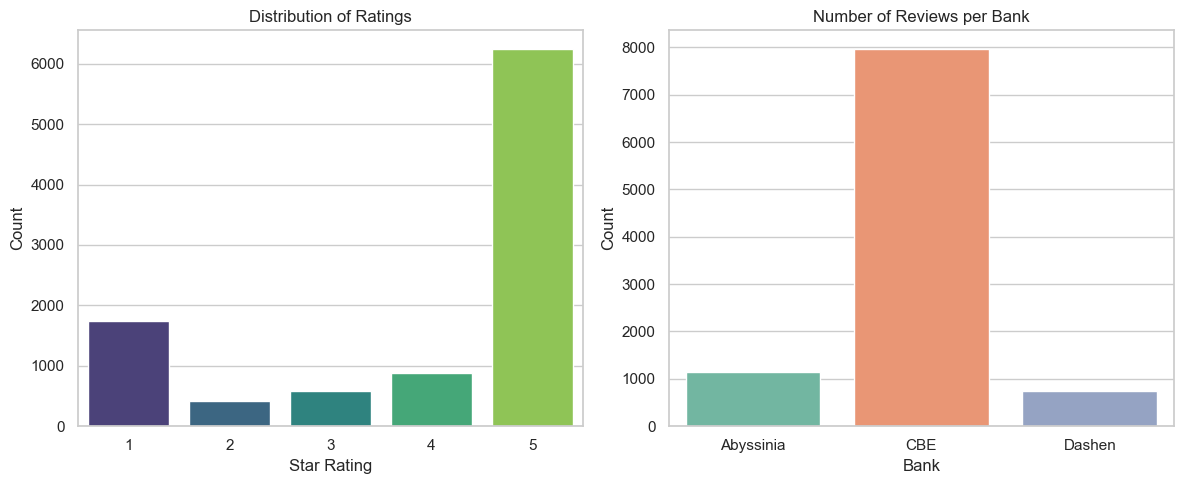

In [4]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## TODO FOR LATER: Visualizing the distribution of ratings per bank  ---USE pd.crosstab

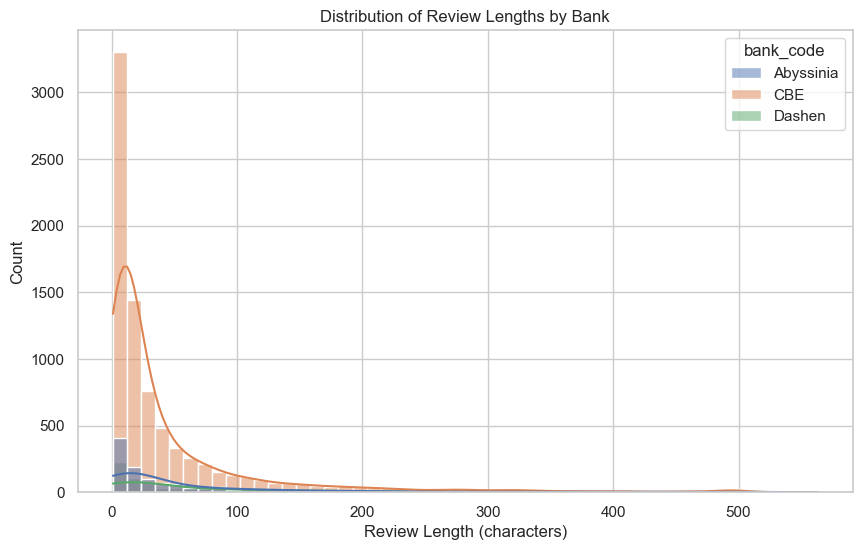

In [5]:
# 3. Review Length Distribution

# TODO FOR LATER :what does the review length distribution tell us about customer feedback styles across different banks
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()